In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf

batch_size = 64
train_datagen = ImageDataGenerator(featurewise_center=True,
                                  rescale = 1/255.0,
                                  rotation_range=15,
                                  brightness_range=(0.1,0.9),
                                  #zoom_range=0.4
                                  )

val_datagen = ImageDataGenerator(rescale = 1/255.0)

train_gen =  train_datagen.flow_from_directory("../data/train",
                                               target_size = (50,50),
                                               color_mode = "grayscale",
                                               class_mode = "categorical",
                                               batch_size = 128)
val_gen = val_datagen.flow_from_directory("../data/validation",
                                          target_size = (50,50),
                                          color_mode = "grayscale",
                                          class_mode = "categorical",
                                          batch_size = 128)

Found 10901 images belonging to 4 classes.
Found 2051 images belonging to 4 classes.


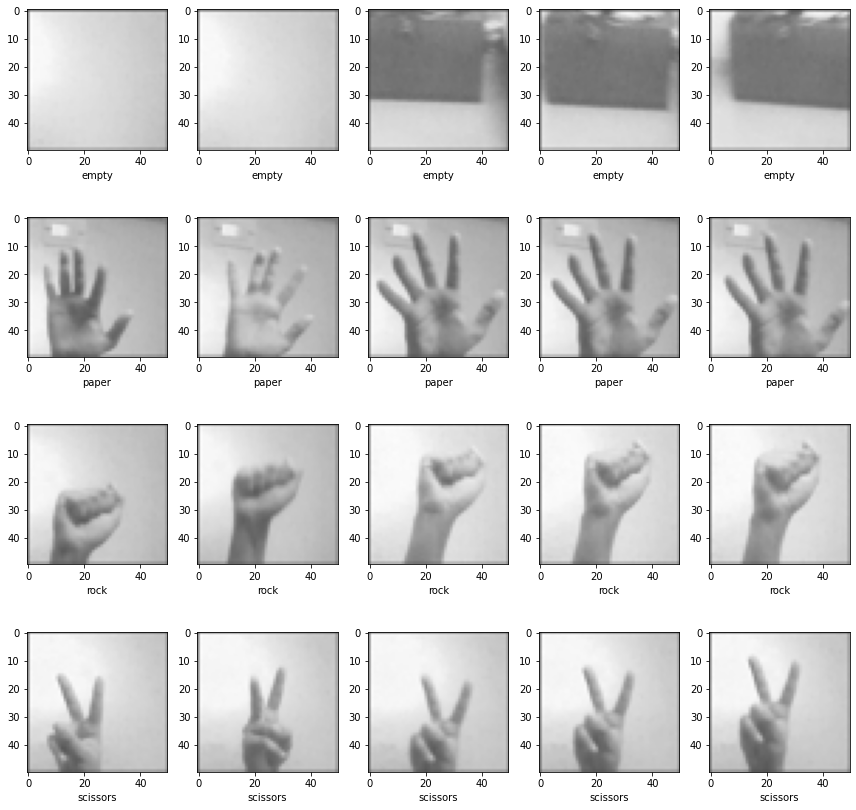

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 50

# input path for the images
base_path = "../data/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.xlabel(expression)
        plt.imshow(img, cmap="gray")

plt.tight_layout()

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), padding="same", activation="relu", input_shape=(50,50,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.54))

model.add(keras.layers.Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.7))

model.add(keras.layers.Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.7))

model.add(keras.layers.Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.6))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.64))

model.add(keras.layers.Dense(4, activation="softmax"))
optimizer = keras.optimizers.Adam(lr =0.001)
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath="model/model2/weight_checkpoints/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit_generator(train_gen,
                   epochs=100,
                   validation_data = val_gen,
                   steps_per_epoch=train_gen.n//train_gen.batch_size,
                   validation_steps=val_gen.n//val_gen.batch_size,
                   callbacks = callbacks_list)

ImportError: Image transformations require SciPy. Install SciPy.

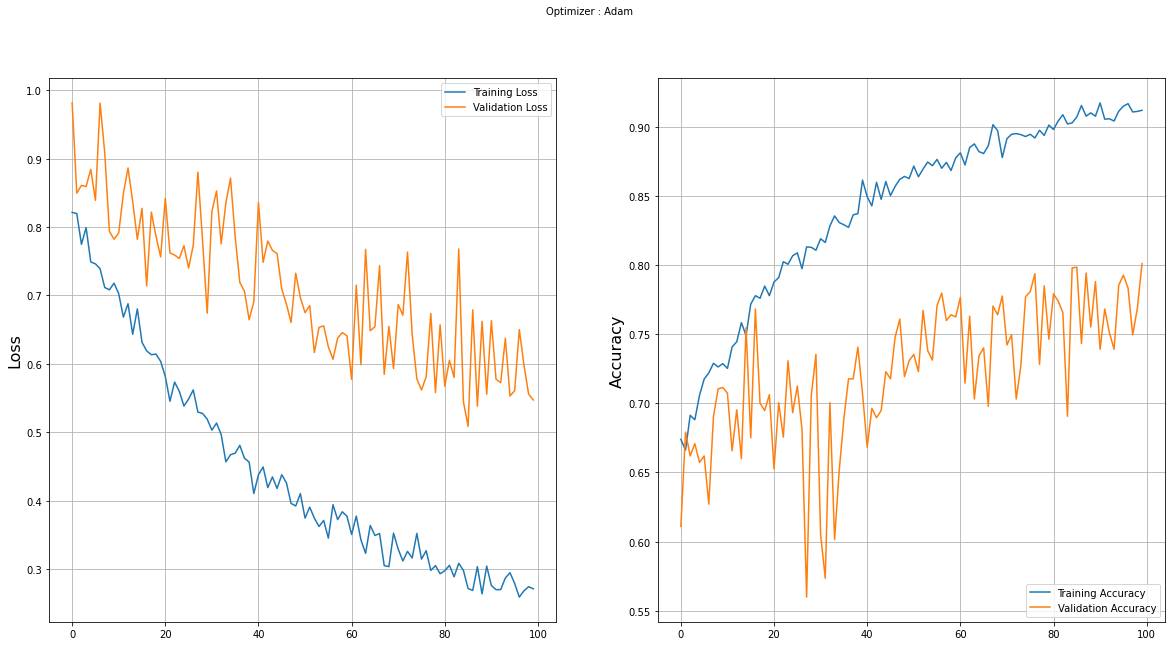

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.grid()
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [8]:
model_json= model.to_json()
with open("model2/model2.json","w") as json_file:
    json_file.write(model_json)
print('model saved')

model saved


In [9]:
model.save_weights("model2/best_weights.h5")